# 7PAVITPR: Introduction to Statistical Programming
# Python practical 12


_Department of Biostatistics and Health Informatics<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>_


_Acknowledgment: based on parts of the course "Big Data Analytics in Python", written by Sagar Jilka, KCL_

# Further data handling packages: plotting and statistics

This practical is a demonstration of plotting and statistics from the follwoing packages:

* MatPLotlib
* seaborn
* SciPy
* statsmodels

There is no coding for you to do - it is a demo for you to read and run, giving examples of how to use these packages.

__NB You need to run every cell!__

# Preparing the data

We will use the same brain size and IQ data sets as from practical 11. We will repeat the main code from that practical to read in the data, merge it and deal with missing values.

In [46]:
# Import pandas...
import pandas as pd

# Read in the data
df_m = pd.read_csv('brain_clinic_measures.csv')
df_p = pd.read_csv('brain_participant_info.csv')

# Drop unwanted columns
df_m = df_m.drop('Unnamed: 0', axis=1)
df_p = df_p.drop('Unnamed: 0', axis=1)

# create one merged DataFrame
df_all = df_m.merge(df_p, on = ['ppt_id'], how = 'left')

# Transform dataframe to means for gender
means_for_gender = df_all.groupby("Gender").transform("mean")

# Fill in Height and Weight NAs with mean for gender
df_all = df_all.fillna(means_for_gender.loc[:,['Height','Weight']])

# Take a look
# df_all.head()
df_all.describe()

,ppt_id,FSIQ,VIQ,PIQ,MRI_Count,Weight,Height
count,40.000000,40.000000,40.000000,40.00000,4.000000e+01,40.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,9.087550e+05,151.822222,402.601316
std,11.690452,24.082071,23.616107,22.47105,7.228205e+04,23.119544,310.903015
min,1.000000,77.000000,71.000000,72.00000,7.906190e+05,106.000000,62.000000
25%,10.750000,89.750000,90.000000,88.25000,8.559185e+05,135.750000,68.750000
50%,20.500000,116.500000,113.000000,115.00000,9.053990e+05,147.500000,635.000000
75%,30.250000,135.500000,129.750000,128.00000,9.500780e+05,172.000000,685.750000
max,40.000000,144.000000,150.000000,150.00000,1.079549e+06,192.000000,765.000000


# Plotting and visualising data

Start with basic bar/line plots, learning seaborn methods, and then something interactive

In [47]:
#we need to import more libraries, notably matplotlib and seaborn

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

#note the magic function below. This is important because it will allow the plots you
#create to appear here in the notebook.
%matplotlib inline


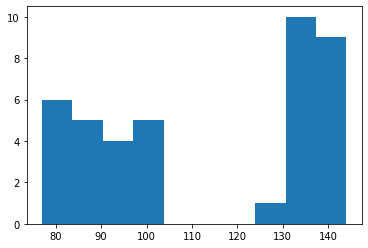

In [48]:
xx = df_all["FSIQ"] # you can replace FSIQ with any other column.. try it
plt.hist(xx, bins = 10);

Now lets consider the seaborn library, which we will use as seaborn is generally easier, and make the images much better!

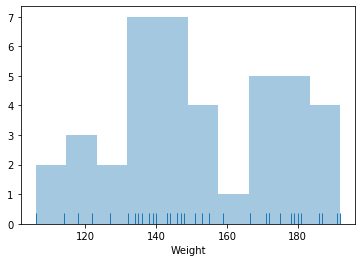

In [49]:
sns.distplot(df_all['Weight'], kde=False, rug=True, bins = 10)

We want to investigate:


(1) Differences in IQ/brain size between men and women?

(2) Any correlations?

** Now is a good time to explore the seaborn library. 
I will show you how to use the examples and apply them to your work **

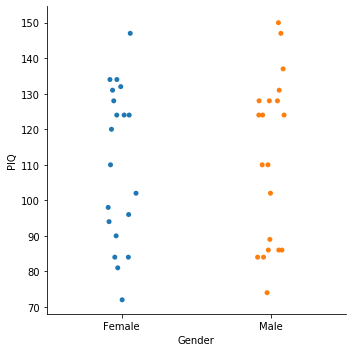

In [50]:
#https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

sns.catplot(data=df_all,
            x="Gender", 
            y="PIQ", 
            #palette={"Male": "blue", "Female": "pink"}, # you can also specify colours!
            kind="strip"); #experiment with different kinds, e.g. “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”.



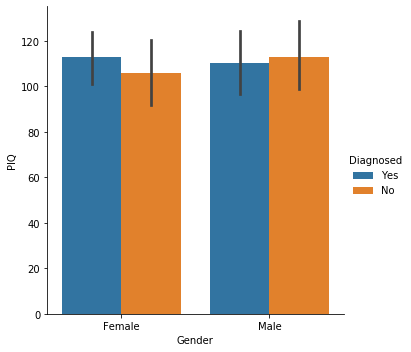

In [51]:
# Lets add another categorical variable to the graph:
# We want to add Diagnosed or not to the figure

sns.catplot(data=df_all,
            x="Gender", 
            y="PIQ", 
            hue = "Diagnosed",
            #palette={"Male": "blue", "Female": "pink"}, # you can also specify colours!
            kind="bar"); #experiment with different kinds, e.g. “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”.



In [52]:
# Lets do some correlations and make a correlation matrix

corr = df_all.corr()

In [53]:
corr

,ppt_id,FSIQ,VIQ,PIQ,MRI_Count,Weight,Height
ppt_id,1.000000,-0.334072,-0.241473,-0.371150,-0.139724,0.140406,-0.051866
FSIQ,-0.334072,1.000000,0.946639,0.934125,0.357641,-0.051816,0.214837
VIQ,-0.241473,0.946639,1.000000,0.778135,0.337478,-0.065207,0.186785
PIQ,-0.371150,0.934125,0.778135,1.000000,0.386817,-0.006720,0.186126
MRI_Count,-0.139724,0.357641,0.337478,0.386817,1.000000,0.514483,0.085562
Weight,0.140406,-0.051816,-0.065207,-0.006720,0.514483,1.000000,0.055469
Height,-0.051866,0.214837,0.186785,0.186126,0.085562,0.055469,1.000000


In [54]:
# Now lets add some colour to help differentiate between variables

corr.style.background_gradient().set_precision(2)

,ppt_id,FSIQ,VIQ,PIQ,MRI_Count,Weight,Height
ppt_id,1,-0.33,-0.24,-0.37,-0.14,0.14,-0.052
FSIQ,-0.33,1,0.95,0.93,0.36,-0.052,0.21
VIQ,-0.24,0.95,1,0.78,0.34,-0.065,0.19
PIQ,-0.37,0.93,0.78,1,0.39,-0.0067,0.19
MRI_Count,-0.14,0.36,0.34,0.39,1,0.51,0.086
Weight,0.14,-0.052,-0.065,-0.0067,0.51,1,0.055
Height,-0.052,0.21,0.19,0.19,0.086,0.055,1


If you want to calculate pearson r then you can use the function below, don't worry about the code

In [55]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [56]:
calculate_pvalues(df_all)

,ppt_id,FSIQ,VIQ,PIQ,MRI_Count,Weight,Height
ppt_id,0,0.0351,0.1333,0.0184,0.3898,0.3875,0.7506
FSIQ,0.0351,0,0,0,0.0235,0.7508,0.1831
VIQ,0.1333,0,0,0,0.0332,0.6893,0.2485
PIQ,0.0184,0,0,0,0.0137,0.9672,0.2502
MRI_Count,0.3898,0.0235,0.0332,0.0137,0,0.0007,0.5996
Weight,0.3875,0.7508,0.6893,0.9672,0.0007,0,0.7339
Height,0.7506,0.1831,0.2485,0.2502,0.5996,0.7339,0


In [57]:
#Exploring scatterplots

#https://seaborn.pydata.org/generated/seaborn.scatterplot.html

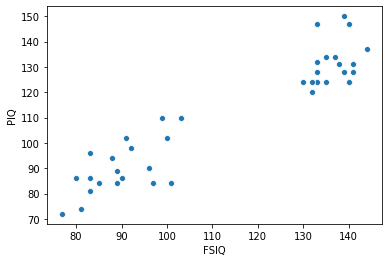

In [58]:
sns.scatterplot(x="FSIQ", y="PIQ", data=df_all)

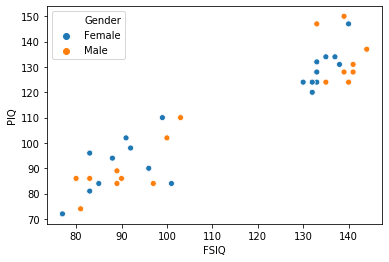

In [59]:
#plt.figure(figsize=(10,8))

sns.scatterplot(data=df_all,
                x="FSIQ", 
                y="PIQ", 
                hue="Gender",) #experiment with different categorical 'hues', e.g. Diagnosed
                #size = "Height") # Explore what the size argument does...


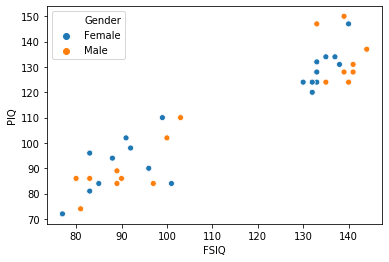

In [60]:
# Saving your figures for publication

# assign the code to a random variable (something like g = )

g = sns.scatterplot(data=df_all,
                x="FSIQ", 
                y="PIQ", 
                hue="Gender",) #experiment with different categorical 'hues', e.g. Diagnosed
                #size = "Height") # Explore what the size argument does...

    
# Use the savefig argument and provide a filename, such as figure1.png
# You can use keyword arguments based on your journal's submission requirements
# For exmaple, for the British Journal of Psychiatry (https://www.cambridge.org/core/services/authors/journals/journals-artwork-guide)
# they want images at 300dpi and ideally in TIFF format, so you can save your figure appropriately
# So check with your submission guidelines and provide the appropriate arguments
# Tip: for posters, you might want to use the transparancy argument

g.figure.savefig("output.tiff", dpi = 300, transparency = True)

In [61]:
df_all.head()

,ppt_id,FSIQ,VIQ,PIQ,MRI_Count,Gender,Weight,Height,Diagnosed
0,1,133,132,124,816932,Female,118.000000,645.0,Yes
1,2,140,150,124,1001121,Male,166.444444,725.0,No
2,3,139,123,150,1038437,Male,143.000000,733.0,Yes
3,4,133,129,128,965353,Male,172.000000,688.0,No
4,5,137,132,134,951545,Female,147.000000,65.0,Yes


# Some statistics in Python

##### IV = Gender (Male, Female), also Diagnoses (Yes, No)
##### DV = IQ Scores (FSIQ, VIQ, PIQ)

We want to test if there is a difference in IQ measures between genders? Or "diagnosed"? What tests can we use?

In [62]:
# There are two libraries (that i know of anyway) to do stats in Python - scipy and statsmodels

# Lets start with scipy and we will compare the syntax and output with statsmodel

# Import as below...

import scipy.stats as stats

In [63]:
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### Assumption of normality

#### Shapiro-wilk test (output = w test statistic, p value)

In [64]:
print(stats.shapiro(df_all["FSIQ"]))

# consider the difference between the above and the below commented code:

print(stats.shapiro(df_all["FSIQ"][df_all['Gender'] == 'Male']))

(0.8300552368164062, 3.057045250898227e-05)
(0.8203510046005249, 0.0017663020407781005)


In [65]:
# You can also test other DVs

print(stats.shapiro(df_all["PIQ"]))
print(stats.shapiro(df_all["VIQ"]))

(0.9278563261032104, 0.013718176633119583)
(0.9212856292724609, 0.00845432560890913)


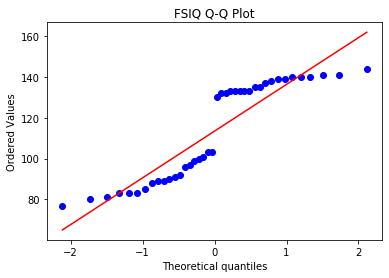

In [66]:
# Now lets make some Q-Q Plots
stats.probplot(df_all["FSIQ"],plot= plt)

# Give your figure a title
plt.title("FSIQ Q-Q Plot");

FSIQ
(0.8203510046005249, 0.0017663020407781005)
PIQ
(0.9154750108718872, 0.08110667765140533)
VIQ
(0.881869912147522, 0.0191198717802763)


Assumption of normality is violated as (all) the p-values are < than 0.05.


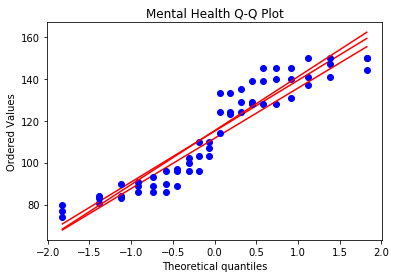

In [67]:
# Lets make a loop and test all three of our IQ DVs in one go:

# First make a list variable called cols with your DVs in it
cols = ['FSIQ', 'PIQ', 'VIQ']

# Then make a loop using the for statement. This will loop through every item in cols
# and do you tell it to do, in this case, we are telling it to do stats.shapiro
for i in cols:
    print(i)
    print(stats.shapiro(df_all[i][df_all['Gender'] == 'Male']))
    
for i in cols:
    stats.probplot(df_all[i][df_all['Gender'] == 'Male'], plot= plt)
    plt.title("Mental Health Q-Q Plot")
    
print("\n\nAssumption of normality is violated as (all) the p-values are < than 0.05.")

##### Levene's Test 

In [68]:
levene_1 = df_all["PIQ"][df_all['Gender'] == 'Male']
levene_2 = df_all["PIQ"][df_all['Gender'] == 'Female']

In [69]:
stats.levene(levene_1, levene_2)

LeveneResult(statistic=0.1050579590471509, pvalue=0.7476197031711318)

In [70]:
# Lets make a quick loop so we can run a levene's test on all our DVs

for i in cols:
    print(i , ':' , stats.levene(df_all[i][df_all['Gender'] == 'Male'], 
                                 df_all[i][df_all['Gender'] == 'Female']))

FSIQ : LeveneResult(statistic=0.24447043811144256, pvalue=0.6238422857062207)
PIQ : LeveneResult(statistic=0.1050579590471509, pvalue=0.7476197031711318)
VIQ : LeveneResult(statistic=0.7852826699352736, pvalue=0.38110422921600584)


##### ANOVA 

In [71]:
# We will statsmodels because the output is better (more readable)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Documentation here: https://www.statsmodels.org/stable/index.html

In [72]:
results = ols("FSIQ ~ C(Gender)", data = df_all).fit()

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FSIQ   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.1621
Date:                Fri, 11 Oct 2019   Prob (F-statistic):              0.689
Time:                        09:15:19   Log-Likelihood:                -183.42
No. Observations:                  40   AIC:                             370.8
Df Residuals:                      38   BIC:                             374.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           111.9000      5.444     20.556      0.000     100.880     122.920
C(Gender)[T.Male]     3.1000      7.699      0.403      0.689     -12.485      18.685
==============================================================================
Omnibus:                      104.117   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.241
Skew:                          -0.131   Prob(JB):                       0.0728
Kurtosis:                       1.246   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
print("The adfsaf asdf , F(%f, %f) = %f , p = %f" %(results.df_resid, 
                                                    results.df_model,
                                                    results.fvalue, 
                                                    results.f_pvalue))

The adfsaf asdf , F(38.000000, 1.000000) = 0.162145 , p = 0.689446


In [75]:
# Consider writing a function that writes out your results section for you!
# You need to find the following bits of info from the above...

# F(df effect, df error) = F-value, MSE = mean-square error, p-value". 
# e.g., "IQ scores did/didn't differ significantly between genders, F(X,XX) = XXXX, MSE = XXX, p = XXX.

# You can find each of those individual bits of data by typing results. then hit tab and 
# you will be able to see all the methods that the results object contains!

# For instance:

#print(results.df_model)
#print(results.df_resid)
#print(results.fvalue)
#print(results.f_pvalue)
#print(results.mse_total)

# Now you just need to put all that together...

In [76]:
def res_output(dv, iv, df):

        # So first make two variables that represent the IV and DV
        x = ("~ C(%s)" %iv)
        y = str(dv + x)
        
        # Then make the model.
        results = ols(y, data=df).fit()
        
        # Then make a statement which prints out an appropriate statement 
        # based on the p-value...
        
        if results.f_pvalue > 0.05:
            
            print("A one-way ANOVA was conducted to compare difference in %s between %s. We found no significant difference between %s,\
                   F(%f, %f) = %f , p = %f" %(dv, iv, iv,
                                              results.df_model, 
                                              results.df_resid,
                                              results.fvalue, 
                                              results.f_pvalue))
        else:
            print("A one-way ANOVA was conducted to compare difference in %s between %s. We found a significant difference between %s\
                   F(%f, %f) = %f , p = %f" %(dv, iv, iv,
                                              results.df_model, 
                                              results.df_resid,
                                              results.fvalue, 
                                              results.f_pvalue))
        
        # If you fancy, you can tell the function to return an output such as the
        # summary table, if so, uncomment the bottom bit below...
        
        return results.summary()

In [77]:
# Now you can call your function and give it your arguments like below...

res_output(dv = "VIQ", 
           iv = "Gender", 
           df = df_all) 

A one-way ANOVA was conducted to compare difference in VIQ between Gender. We found no significant difference between Gender,                   F(1.000000, 38.000000) = 0.596936 , p = 0.444529


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 11 Oct 2019   Prob (F-statistic):              0.445
Time:                        09:15:19   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.308     20.619      0.000      98.704     120.196
C(Gender)[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""